<a href="https://colab.research.google.com/github/adinugrahadharmaputra/Pemodelan-Optimasi-Tugas-Besar/blob/main/Pemodelan_Optimasi_Tugas_Besar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
from keras.metrics import Accuracy, F1Score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.neural_network import MLPClassifier
import time

# Load Data

In [198]:
!wget -O Data.txt https://raw.githubusercontent.com/adinugrahadharmaputra/Pemodelan-Optimasi-Tugas-Besar/main/DataClassification.txt

--2024-01-09 15:58:30--  https://raw.githubusercontent.com/adinugrahadharmaputra/Pemodelan-Optimasi-Tugas-Besar/main/DataClassification.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 828 [text/plain]
Saving to: ‘Data.txt’

Data.txt            100%[===================>]     828  --.-KB/s    in 0s      

2024-01-09 15:58:30 (45.3 MB/s) - ‘Data.txt’ saved [828/828]



In [199]:
df = pd.read_csv('Data.txt', delimiter='\t')
df

,x,Y,LABEL
0,1.0000,399.6550,1
1,5.8293,428.5600,1
2,10.6585,266.0618,1
3,15.4878,376.9293,1
4,20.3171,383.6759,1
5,25.1463,463.8939,1
6,29.9756,502.8094,1
7,34.8049,536.4060,1
8,39.6341,412.8075,1
9,44.4634,553.9108,1


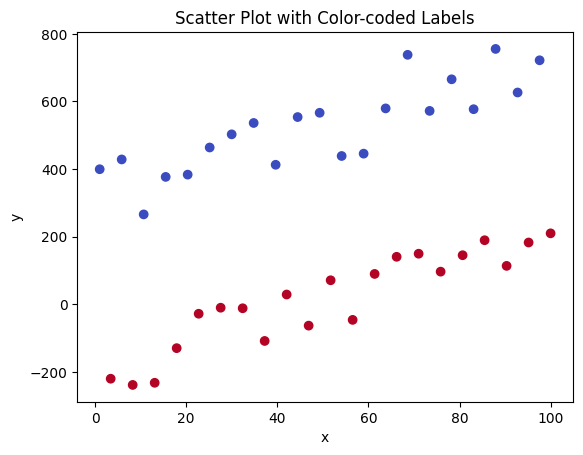

In [200]:
plt.scatter(df['x'], df['Y'], c=df['LABEL'], cmap='coolwarm')
plt.title('Scatter Plot with Color-coded Labels')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [201]:
X = df[['x', 'Y']]
y = df['LABEL']

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =50)

# Model

In [203]:
model_n_trial=10
# model_patience = 100
lr_range = (0.00001,0.1)

## SVM

### creating model

In [204]:
svm_classifier=SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear')

### evaluation

In [205]:
y_pred =svm_classifier.predict(X_test)

In [206]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)



Confusion Matrix:
 [[5 0]
 [0 4]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


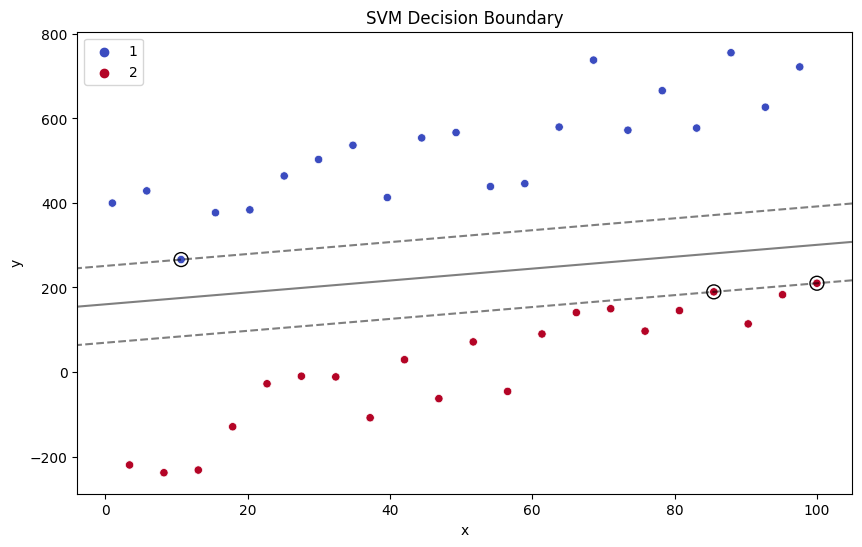

In [207]:
# Visualize the decision boundary
plt.figure(figsize=(10, 6))

# Plot the data points
sns.scatterplot(x='x', y='Y', hue='LABEL', data=df, palette='coolwarm', legend='full')

# Create a meshgrid to plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

plt.title('SVM Decision Boundary')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Pada gambar di atas dapat dilihat bahwa model SVM dapat membagi data ke dalam kelas yang benar. Terdapat 3 support vector yang dijadikan titik acuan dalam membentuk hyperplane pada model ini.

## ANN

In [208]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.show()

### creating model

In [209]:
ann_model = MLPClassifier(hidden_layer_sizes=(4), activation='relu', solver='adam', max_iter=1000, random_state = 40)
ann_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=4, max_iter=1000, random_state=40)

In [210]:
y_pred = ann_model.predict(X_test)

In [211]:
y_pred

array([1, 2, 2, 2, 1, 1, 1, 2, 1])

In [212]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Confusion Matrix:
 [[5 0]
 [0 4]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



### Evaluation

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


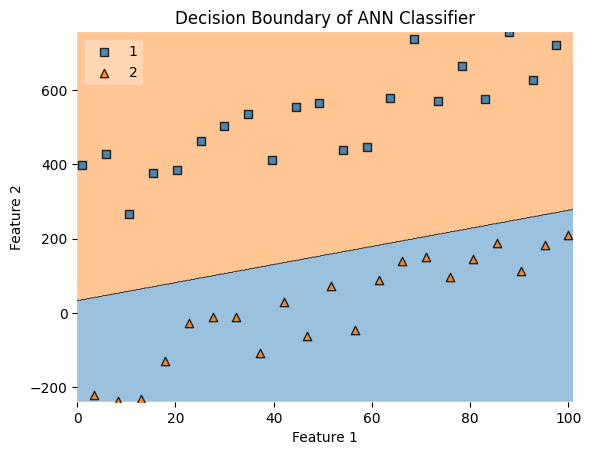

In [213]:
# Plot decision boundary
plot_decision_regions(X.values, y.values, clf=ann_model, legend=2)

# Label the axes and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of ANN Classifier')

# Show the plot
plt.show()

Pada gambar di atas model ANN juga berhasil memisahkan semua data ke dalam kelompok yang benar.

## Decision Tree

### creating model

In [214]:
tree_model = DecisionTreeClassifier(random_state=43)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=43)

In [215]:
y_pred = tree_model.predict(X_test)

In [216]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Confusion Matrix:
 [[5 0]
 [0 4]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


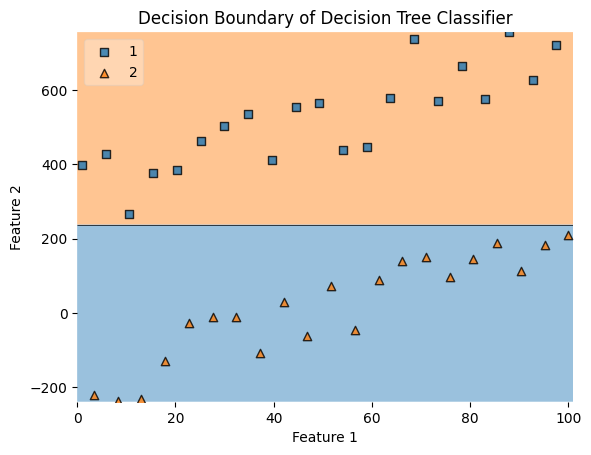

In [217]:

# Plot decision boundary
plot_decision_regions(X.values, y.values, clf=tree_model, legend=2)

# Label the axes and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Decision Tree Classifier')

# Show the plot
plt.show()

Pada gambar di atas, model decision tree berhasil memisahkan semua data ke dalam kelompok yang benar namun garis pemisah yang dihasilkan merupakan garis horizontal. Dalam hal ini  hasil tersebut didapatkan karenakan proses pengambilan keputusan decision tree yang mengambil keputusan berdasarkan posisi data pada feature ke 2. Model ini membagi kelas data hanya dengan 1 keputusan, yaitu jika fitur ke 2 lebih  atau kurang dari nilai tertentu, maka titik pada data akan dimasukan ke dalam kelas tertentu.

## KNN

In [218]:
# Create and train a k-NN classifier
k_value = 5 # You can adjust the number of neighbors (k) as needed
knn_model = KNeighborsClassifier(n_neighbors=k_value)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [219]:
y_pred = knn_model.predict(X_test)

In [220]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Confusion Matrix:
 [[5 0]
 [0 4]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


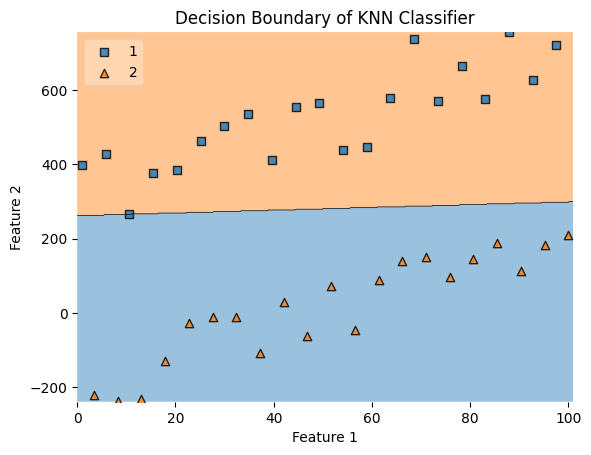

In [221]:
# Plot decision boundary
plot_decision_regions(X.values, y.values, clf=knn_model, legend=2)

# Label the axes and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of KNN Classifier')

# Show the plot
plt.show()


Pada model KNN memberikan hasil yang secara keseluruhan berhasil memisahkan seluruh titik pada data ke kelas yang benar. Pada model ini KNN memisahkan kelompok data berdasarkan jarak data terhadap tetangganya.

# Kesimpulan

Berdasarkan hasil  yang didapatkan setiap model berhasil mengklasifikasikan data dengan tepat. Setiap model berhasil mengklasifikasikan datanya dengan sangat tepat dikarenakan bentuk datanya yang sangat sederhana dan terdapat pembagian yang cukup jelas di antara kedua kelas. Persebaran data dengan pembagian data yang jelas memudahkan model dalam mengklasifikasikan data yang diberikan.